In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
FIPS_Col = []

DataBasic = pd.read_csv('data_basic.csv')
for val in DataBasic['FIPS']:
    FIPS_Col.append(val)
DataBasic = DataBasic.drop(columns=['Unnamed: 0', 'FIPS'])

DataGeography = pd.read_csv('data_geography.csv')
DataGeography = DataGeography.drop(columns=['Unnamed: 0', 'FIPS'])

DataDemographics = pd.read_csv('data_demographics.csv')
DataDemographics = DataDemographics.drop(columns=['Unnamed: 0', 'FIPS'])

DataHealth = pd.read_csv('data_health.csv')
DataHealth = DataHealth.drop(columns=['Unnamed: 0', 'FIPS'])

DataTotal = pd.read_csv('data.csv')
DataTotal = DataTotal.drop(columns=['Unnamed: 0', 'FIPS'])

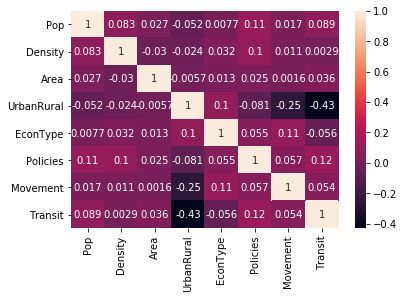

In [3]:
corrBasic = DataBasic.corr()
sn.heatmap(corrBasic, annot=True)
plt.show()

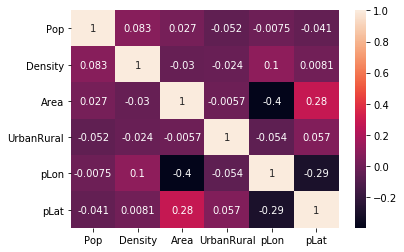

In [4]:
corrGeography = DataGeography.corr()
sn.heatmap(corrGeography, annot=True)
plt.show()

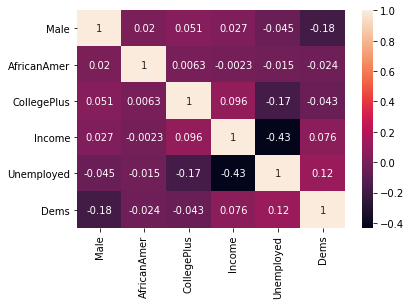

In [5]:
corrDemographics = DataDemographics.corr()
sn.heatmap(corrDemographics, annot=True)
plt.show()

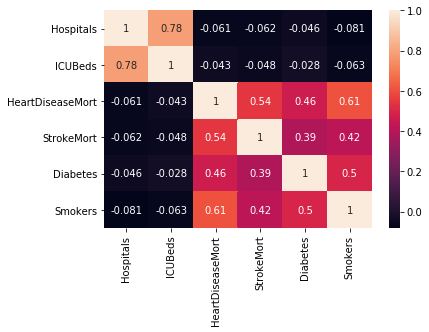

In [6]:
corrHealth = DataHealth.corr()
sn.heatmap(corrHealth, annot=True)
plt.show()

In [7]:
# PCA
# Can't really decide any variables to drop from correlation matrices
# Helper function

def PCA_Elbow_Method(Data):
    Data = Data.to_numpy()
    pca = PCA()
    X = pca.fit_transform(Data)
    eigenvalues = pca.singular_values_
    eigenvalues = eigenvalues / sum(eigenvalues)
    
    plt.plot([*range(1, len(eigenvalues) + 1)], eigenvalues)
    plt.xlabel('Number of components')
    plt.ylabel('Proportion of variance')
    plt.title('Num components vs variance') 
    
    return X

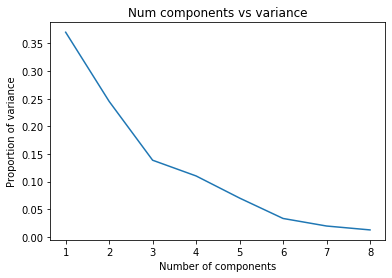

In [8]:
DataBasic = PCA_Elbow_Method(DataBasic)

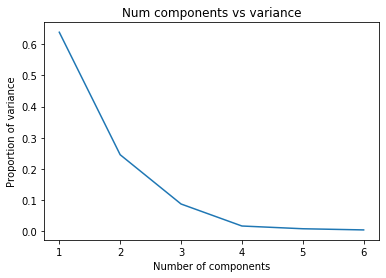

In [9]:
DataGeography = PCA_Elbow_Method(DataGeography)

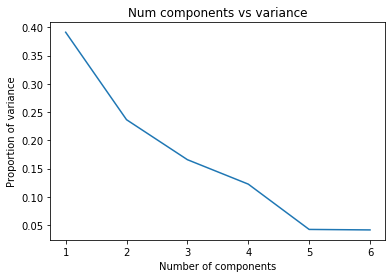

In [10]:
DataDemographics = PCA_Elbow_Method(DataDemographics)

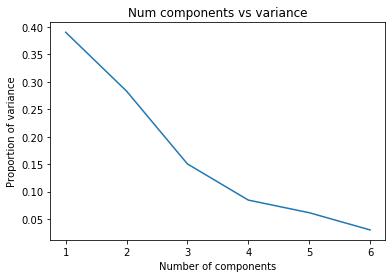

In [11]:
DataHealth = PCA_Elbow_Method(DataHealth)

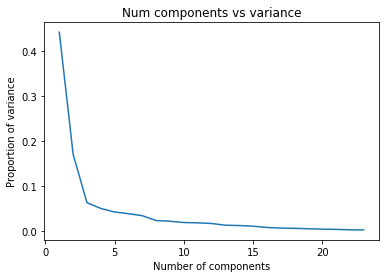

In [12]:
DataTotal = PCA_Elbow_Method(DataTotal)

In [13]:
# slice data after using elbow method
DataBasic = DataBasic[:,:5]
DataGeography = DataGeography[:,:3]
DataDemographics = DataDemographics[:,:4]
DataHealth = DataHealth[:,:3]
DataTotal = DataTotal[:,:4]

In [14]:
def Insert_FIPS(Data):
    Data = pd.DataFrame(Data)
    Data.insert(loc=0, column='FIPS', value=FIPS_Col)
    return Data


In [15]:
DataBasic = Insert_FIPS(DataBasic)
DataGeography = Insert_FIPS(DataGeography)
DataDemographics = Insert_FIPS(DataDemographics)
DataHealth = Insert_FIPS(DataHealth)
DataTotal = Insert_FIPS(DataTotal)

In [16]:
DataBasic.to_csv('pca_basic.csv')
DataGeography.to_csv('pca_geography.csv')
DataDemographics.to_csv('pca_demographics.csv')
DataHealth.to_csv('pca_health.csv')
DataTotal.to_csv('pca_total.csv')